# <u>**Back Order Predictions in Supply Chain**<u>

In [1]:
#Loading the necessary libraries 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
train_df = pd.read_csv('Datasets//Kaggle_Training_Dataset_v2.csv')


## **Dataset Description:**


* Sku(Stock Keeping unit) : The product id — Unique for each row so can be ignored

* National_inv : The present inventory level of the product

* Lead_time : Transit time of the product

* In_transit_qty : The amount of product in transit

* Forecast_3_month , Forecast_6_month , Forecast_9_month : Forecast of the sales of the product for coming 3 , 6 and 9 months respectively

* Sales_1_month , sales_3_month ,sales_6_month , sales_9_month : Actual sales of the product in last 1 , 3 ,6 and 9 months respectively

*  Min_bank : Minimum amount of stock recommended

* Potential_issue : Any problem identified in the product/part

* Pieces_past_due: Amount of parts of the product overdue if any

* Perf_6_month_avg , perf_12_month_avg : Product performance over past 6 and 12 months respectively

* Local_bo_qty : Amount of stock overdue

* Deck_risk , oe_constraint, ppap_risk, stop_auto_buy, rev_stop : Different Flags (Yes or No) set for the product

* Went_on_backorder : Target variable(Products that went to Backorder(‘Yes’) to those which didn’t go to Backorder(‘No’)

In [3]:
train_df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [4]:
train_df.shape

(1687861, 23)

In [5]:
print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

## Data preparation

In [6]:
#printing first 5 rows of train_df
train_df.head(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


Treating missing values 

In [7]:
#printing null values from each column
train_df.isna().sum()
## 5.98% of the values are missing in lead_time

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [8]:
#replacing missing values with median
train_df['lead_time'].fillna(train_df.lead_time.median(), inplace=True)

In [15]:
## Checking value counts of each column

for col in train_df.columns.to_list():
  print(train_df[col].value_counts())
  print('\n***********\n')

sku
1026827           1
1489889           1
1489899           1
1489898           1
1489897           1
                 ..
1910577           1
1910576           1
1910575           1
1910574           1
(1687860 rows)    1
Name: count, Length: 1687861, dtype: int64

***********

national_inv
 0.0        108425
 2.0        107869
 3.0         90577
 4.0         69588
 5.0         58916
             ...  
 8928.0          1
 14216.0         1
 8153.0          1
 59796.0         1
-208.0           1
Name: count, Length: 14969, dtype: int64

***********

lead_time
8.0     783080
2.0     337402
12.0    199700
4.0     128537
9.0     123649
52.0     30113
3.0      16253
10.0     14192
0.0      10511
14.0     10314
16.0      8843
13.0      5405
6.0       5365
5.0       4031
15.0      3812
17.0      3763
11.0      1094
20.0       416
30.0       312
18.0       221
7.0        209
22.0       133
24.0       115
26.0       105
28.0        84
21.0        49
40.0        48
35.0        35
19.0        

In [9]:
train_df['local_bo_qty'].value_counts()

local_bo_qty
0.0       1664518
1.0          7151
2.0          2982
3.0          1716
4.0          1224
           ...   
307.0           1
2780.0          1
452.0           1
840.0           1
3600.0          1
Name: count, Length: 654, dtype: int64

In [10]:
train_df['pieces_past_due'].value_counts()

pieces_past_due
0.0       1662571
1.0          3917
2.0          2187
4.0          1294
3.0          1217
           ...   
908.0           1
456.0           1
254.0           1
2620.0          1
408.0           1
Name: count, Length: 826, dtype: int64

In [11]:
# 2 variables 'local_bo_qty' and 'pieces_past_due' are having 98.5% and 98.62% missing values.
#As 'Sku' is Id provided for each row (we can remove it too)
#Lets drop these 3 variables
train_df.drop(['local_bo_qty','pieces_past_due','sku'],axis=1,inplace=True)

In [12]:
#dropping all remaining null values
train_df=train_df.dropna()

In [13]:
train_df.isna().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
perf_6_month_avg     0
perf_12_month_avg    0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

Data Cleaning

In [14]:
train_df['perf_6_month_avg'].value_counts()

## -99.00 value in perf_x_montha_avg columns

perf_6_month_avg
 0.99     143757
 1.00     132329
-99.00    129478
 0.73     106468
 0.98      83611
           ...  
 0.20        861
 0.03        703
 0.04        652
 0.01        572
 0.29        515
Name: count, Length: 102, dtype: int64

In [15]:
train_df['perf_6_month_avg'] = train_df['perf_6_month_avg'].replace(-99.00, train_df['perf_6_month_avg'].median())
train_df['perf_12_month_avg'] = train_df['perf_12_month_avg'].replace(-99.00, train_df['perf_12_month_avg'].median())

In [17]:
train_df[train_df['national_inv'] < 0]

## 5888 rows in national_inv col containing negative values

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
176,-55.0,8.0,2.0,428.0,526.0,606.0,25.0,100.0,205.0,387.0,52.0,No,0.82,0.81,No,No,No,Yes,No,Yes
191,-499.0,12.0,350.0,3452.0,5044.0,7188.0,747.0,2550.0,3572.0,4745.0,401.0,No,0.49,0.72,No,No,No,Yes,No,Yes
342,-48.0,8.0,97.0,67.0,85.0,115.0,19.0,87.0,165.0,199.0,14.0,No,0.47,0.47,Yes,No,No,Yes,No,No
552,-1.0,12.0,0.0,6.0,6.0,6.0,0.0,1.0,2.0,2.0,0.0,No,0.82,0.79,No,No,No,Yes,No,No
916,-94.0,9.0,80.0,5.0,8.0,8.0,205.0,205.0,205.0,205.0,0.0,No,0.91,0.74,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687847,-206.0,8.0,0.0,760.0,1145.0,1453.0,114.0,853.0,1764.0,2706.0,0.0,No,0.82,0.81,Yes,No,No,Yes,No,No
1687850,-2.0,8.0,0.0,0.0,62.0,86.0,6.0,32.0,46.0,57.0,2.0,No,0.82,0.81,Yes,No,No,No,No,No
1687851,-6.0,9.0,36.0,130.0,130.0,130.0,0.0,0.0,54.0,57.0,3.0,No,0.03,0.10,No,No,No,Yes,No,No
1687856,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.82,0.81,No,No,No,Yes,No,No


In [18]:
train_df['national_inv'].value_counts()

national_inv
 0.0        108425
 2.0        107869
 3.0         90577
 4.0         69588
 5.0         58916
             ...  
 8928.0          1
 14216.0         1
 8153.0          1
 59796.0         1
-208.0           1
Name: count, Length: 14969, dtype: int64

In [19]:
# Replacing negative values with zero
train_df['national_inv'] = train_df['national_inv'].apply(lambda x: max(x, 0))
train_df['national_inv'].value_counts()

national_inv
0.0        114313
2.0        107869
3.0         90577
4.0         69588
5.0         58916
            ...  
70515.0         1
10060.0         1
10750.0         1
11382.0         1
25045.0         1
Name: count, Length: 14499, dtype: int64

In [22]:
# Descriptive statistics of numerical columns

train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.493690,29615.179653,0.0,4.00,15.00,80.00,12334404.0
lead_time,1687860.0,7.879902,6.841952,0.0,4.00,8.00,8.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


In [20]:
# CATEGORICAL COLUMN

cat_column = [column for column in train_df.columns if train_df[column].dtype == 'object']

In [21]:
cat_column

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

## **EDA**

In [23]:
#asigning all Numerical columns to num_column for further use 
Num_column = [column for column in train_df.columns if train_df[column].dtype != 'object']
#printing all Numerical columns
Num_column

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'perf_6_month_avg',
 'perf_12_month_avg']

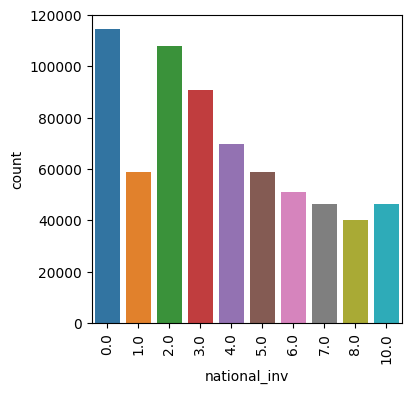

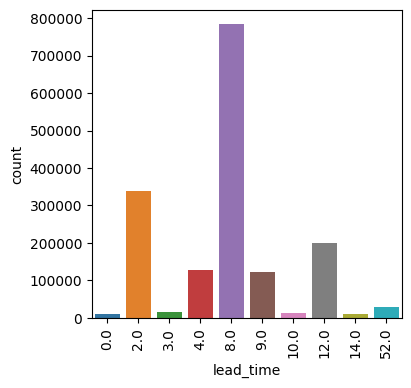

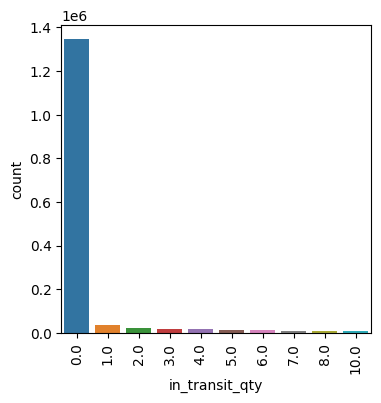

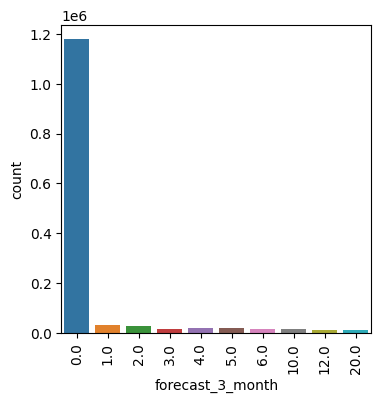

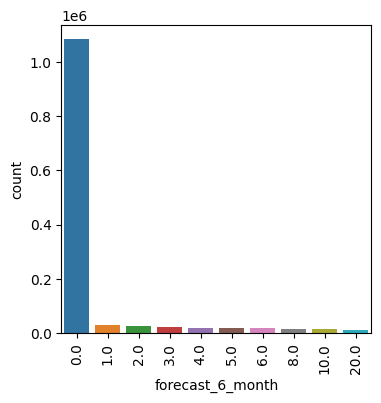

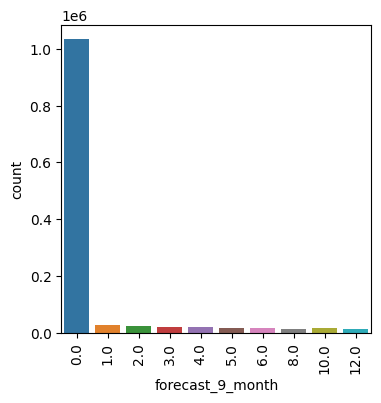

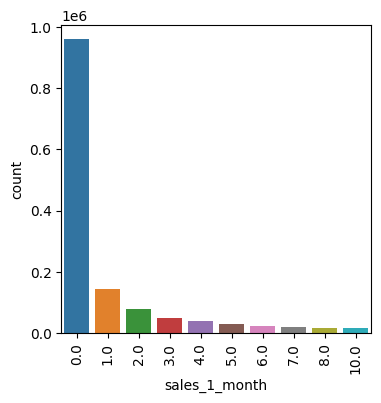

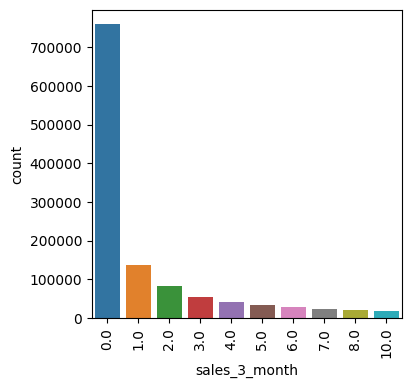

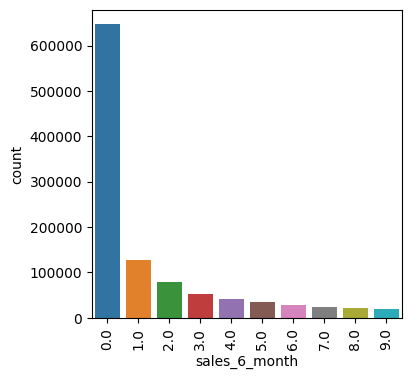

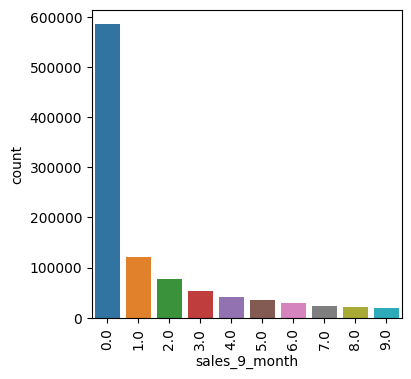

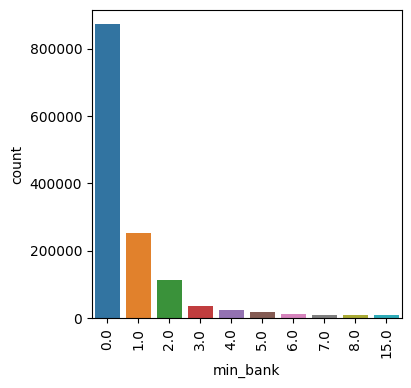

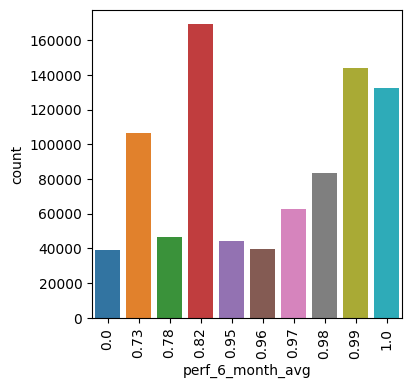

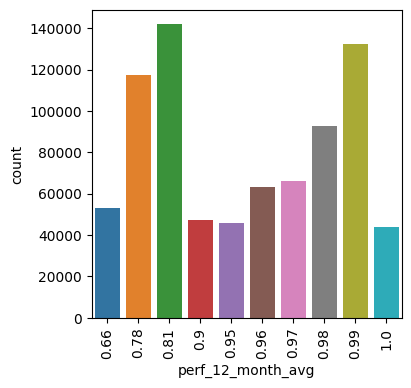

In [24]:
#Plotting bar plot to understanding value_count distribution of every numerical variable 

for col in Num_column:
  #considering top 10 counts for each numerical variable  
  plt.figure(figsize=(4, 4))
  sns.barplot(x=train_df[col].value_counts().head(10).index ,y= train_df[col].value_counts().head(10))
  plt.xticks(rotation=90)
  plt.show()

In [25]:
# Dependent variable
# counting the went_on_backorder variable from data set
train_df['went_on_backorder'].value_counts()

went_on_backorder
No     1676567
Yes      11293
Name: count, dtype: int64

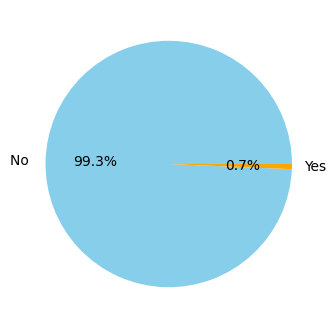

In [26]:
#Ploting pie plot to understand the distribution of went_on_backorder variable
Went_or_not = ['No ','Yes']
data=train_df['went_on_backorder'].value_counts() 
colors = ['skyblue', 'orange']
highlight =(0,0)
# Creating plot
fig = plt.figure(figsize =(4, 4))
plt.pie(data, labels = Went_or_not,autopct='%1.1f%%',colors=colors)
 # show plot
plt.show()

**We have imbalance dependent variable with 99.3% NO and only 0.7% YES if we used it as it is, it will direct impact on our model accuracy, in further process we will try to improve them by using SMOTE**

## Box Plot

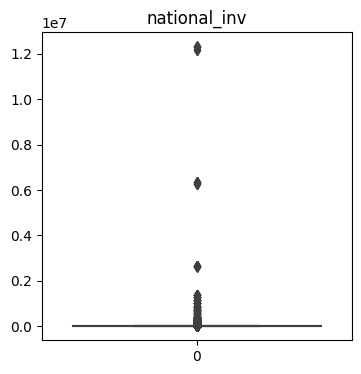

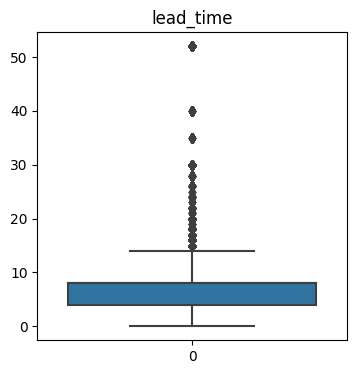

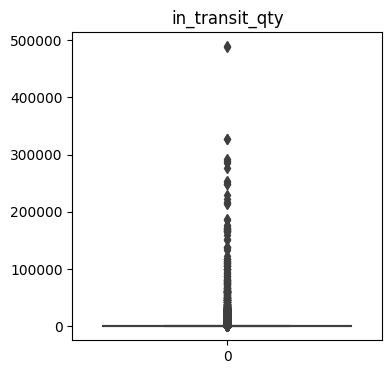

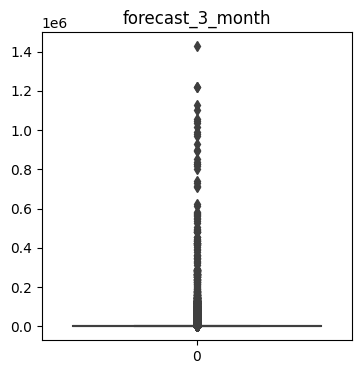

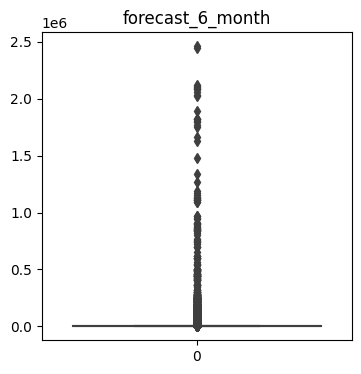

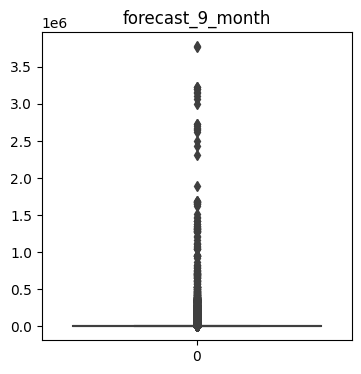

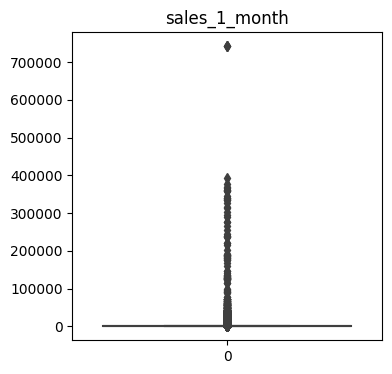

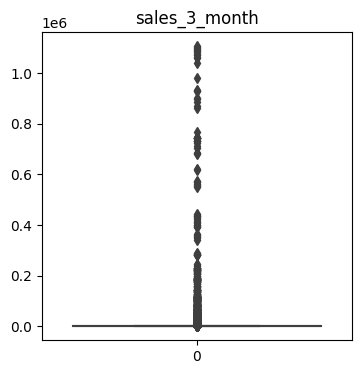

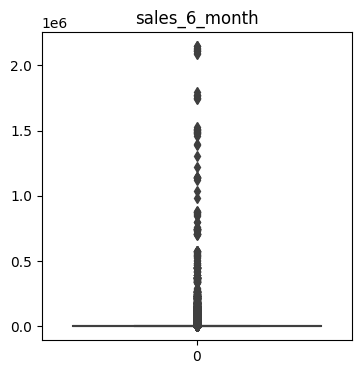

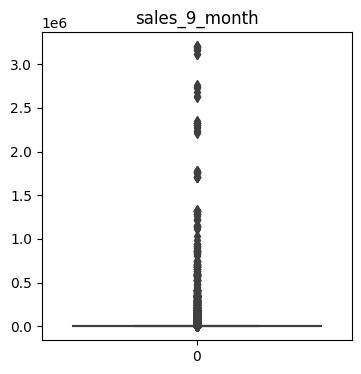

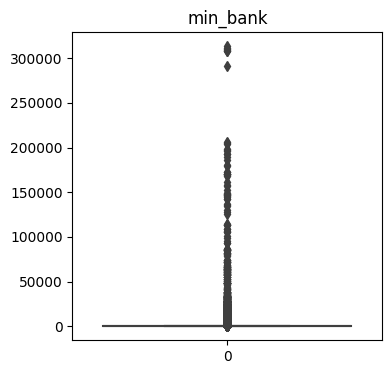

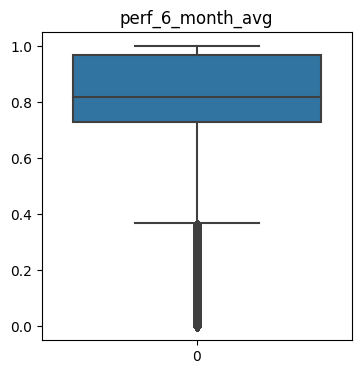

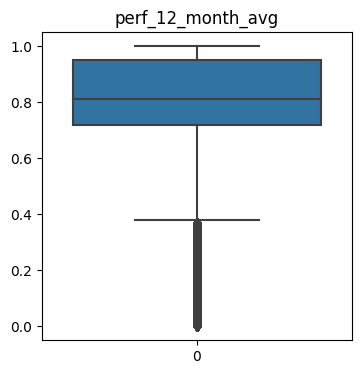

In [27]:
#ploting box plot to indentify the outliers of Numerical columns
for col in Num_column:
  plt.figure(figsize=(4, 4))
  plt.title(col)
  sns.boxplot(train_df[col])
  plt.show()

Pairplots

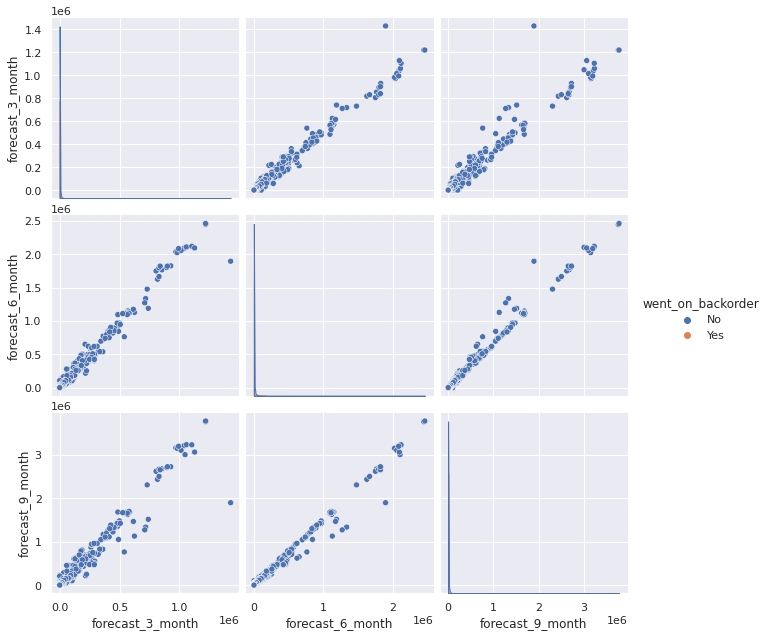

In [ ]:
# Understanding  correlations of Forecast columns by using pairplot.
forecasts = ['forecast_3_month','forecast_6_month', 'forecast_9_month']
sns.pairplot(data = train_df, vars=forecasts, hue='went_on_backorder', height=3)
plt.show()

**Here as you can see all forecast variables are creating linear correlation with each other** 

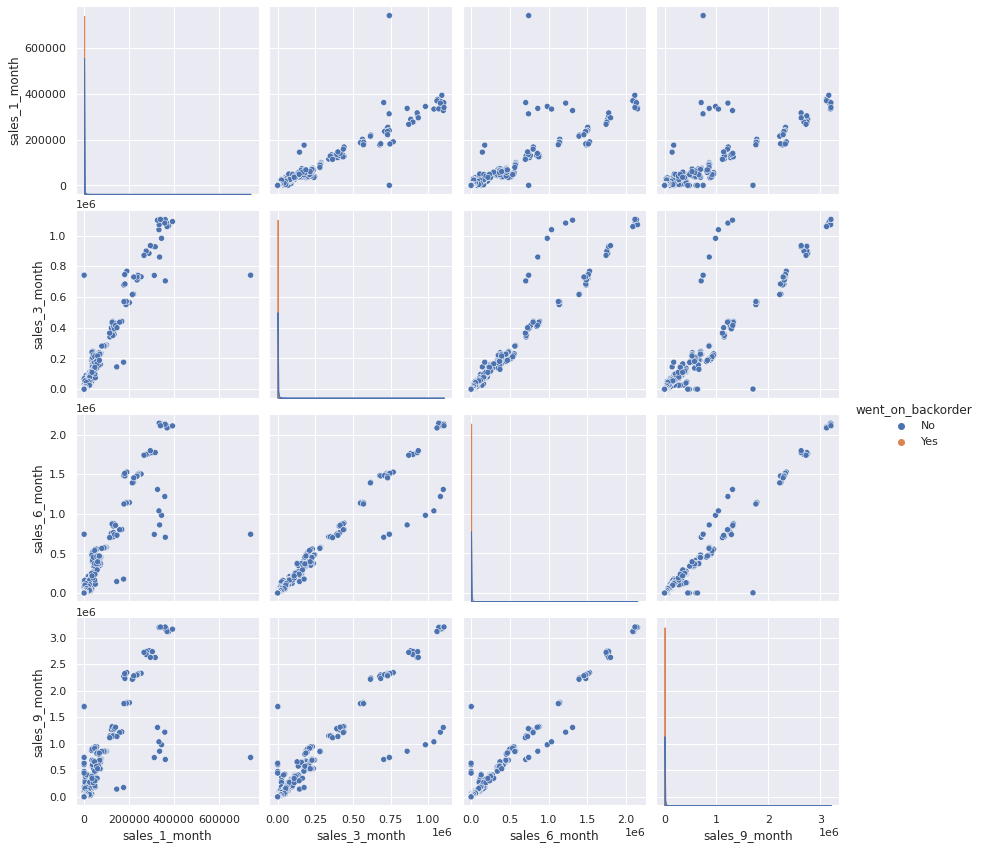

In [ ]:
# Understanding  correlations of Sales columns by using pairplot.
sales = ['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']
sns.pairplot(data=train_df, vars=sales, hue='went_on_backorder', height=3)
plt.show()

Heatmap & Observations

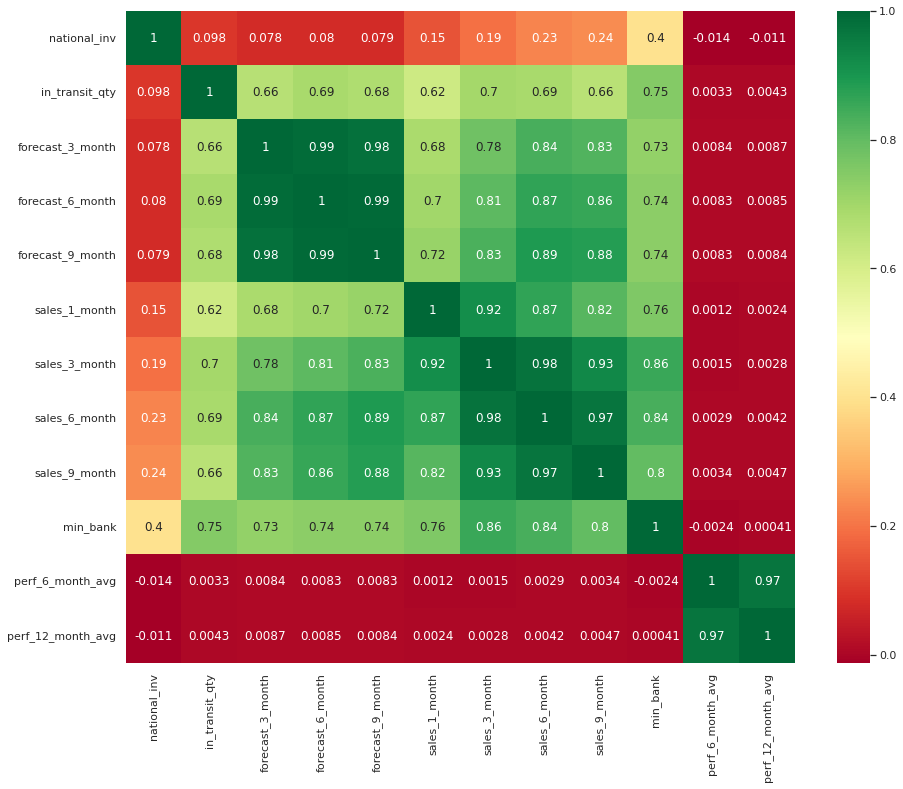

In [ ]:
#Correlation of all the numeric variables by using heatmap
plt.figure(figsize=(15,12))
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn')

**Oberservations**
* forecast_3_month , forecast_6_month and forecast_9_month are very strogly correlated with each other with 0.99 degree
* sales_1_month, sales_3_month, sales_6_month and sales_9_month are strongly correlated with each other with a degree varying from 0.82 to 0.98.
* forecast and sale columns are correlated with each other with a minimum degree of 0.62 varying upto 0.88. It is obvious that when the sales for a certain products is high in the past sales the forecast for the same in the coming months will be higher and viceversa.

* perf_6_month_avg and perf_12_month_avg are very highly correlated with each other to a degree of 0.97.

* min_bank ( minimum amount of stock recommended ) is highly correlated with sales and forecast columns as stock in inventory is directly proportional to sales.

* in_transit_qty is highly correlated with sales, forecast and min_bank columns. This is obvious because high sales of a product => more of that product in transport for inventory replenishing high sales of a product => high forecast.

* national_inv is meekly correlated with min_bank and weekly correlated with sale columns.


### **Outlier's treatment**

In [31]:
#capping outliers to upper and lower limit using IQR range
def treat_outliers_numeric(df2):
  for i in list(df2.describe().columns):
  #Finding IQR
    Q3, Q1 = np.percentile(df2[i], [75 ,25])
    IQR = Q3 - Q1
    upper = Q3 +1.5*IQR
    lower = Q1 - 1.5*IQR
    df2.loc[df2[i]>upper,i] = upper
    df2.loc[df2[i]<lower,i] = lower
    plt.figure(figsize=(15,6))
    plt.title('After Outlier Treatment')
    plt.subplot(1, 2, 1)
    sns.boxplot(df2[i])
    plt.subplot(1, 2, 2)
    sns.distplot(df2[i])


Box plots & corresponding Distribution plots after treating outliers

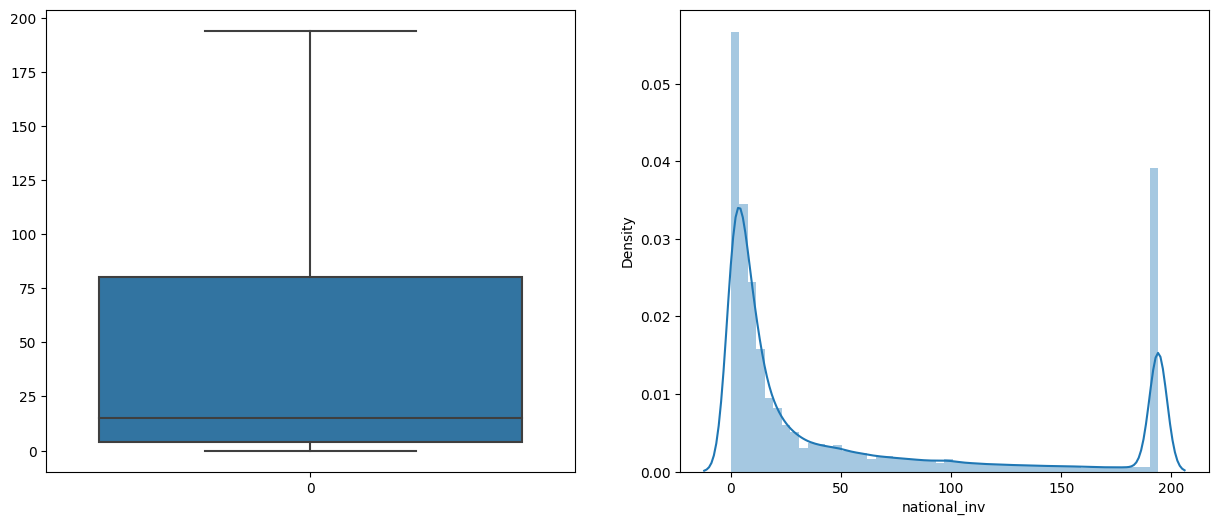

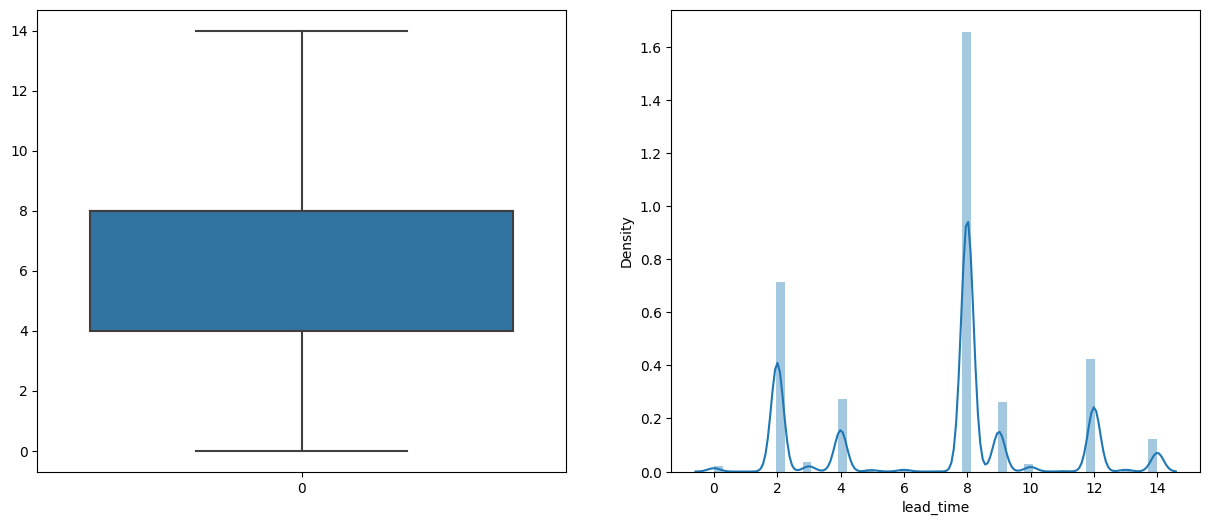

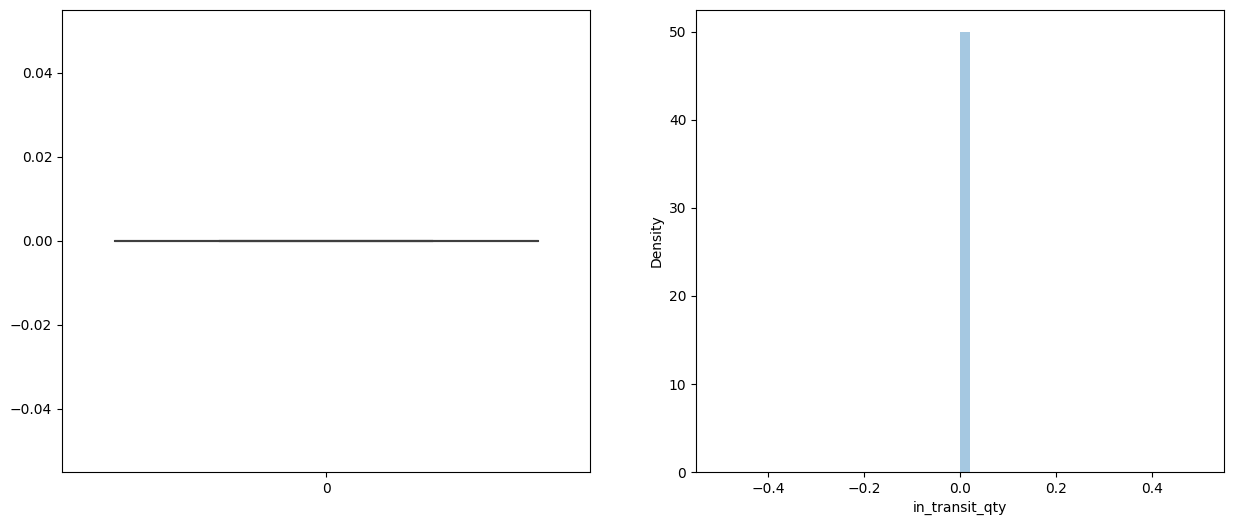

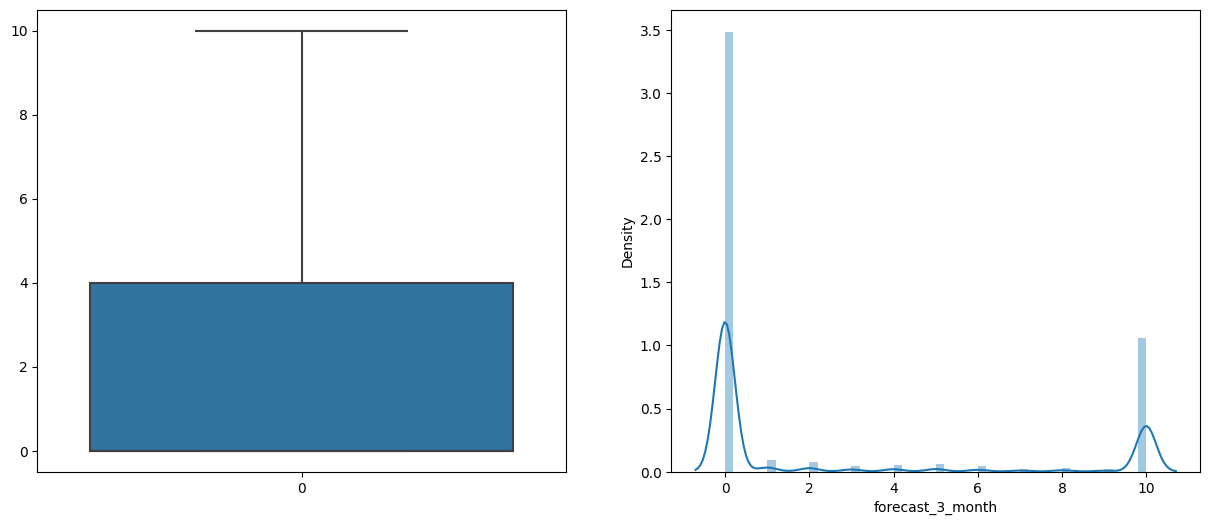

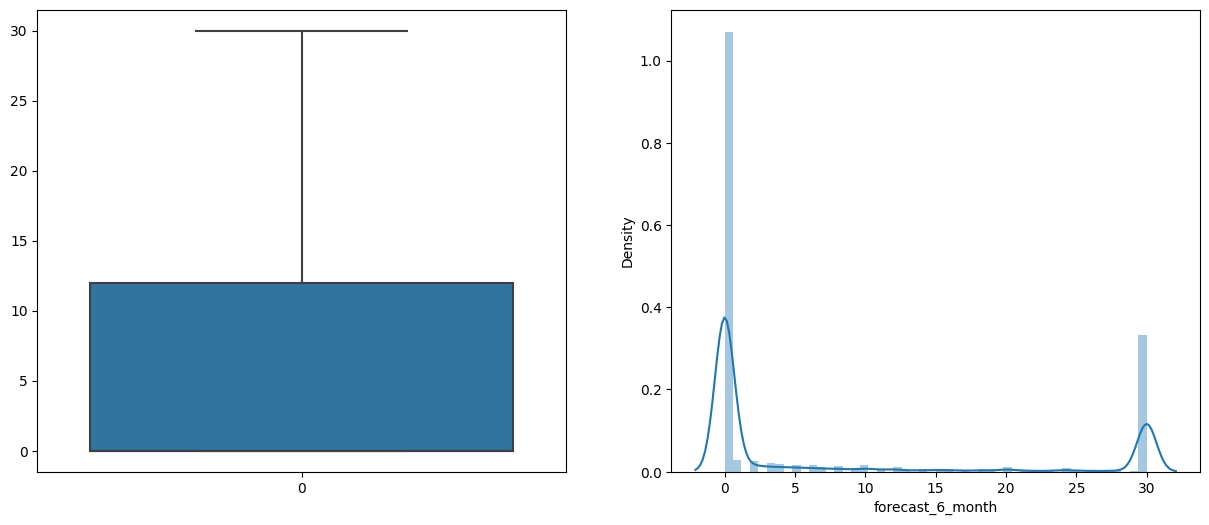

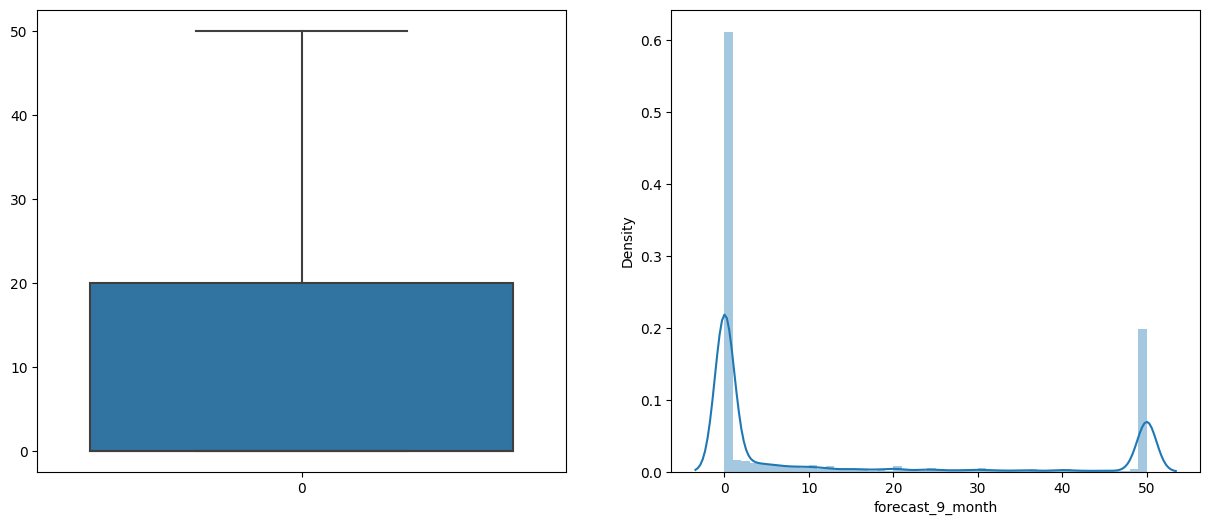

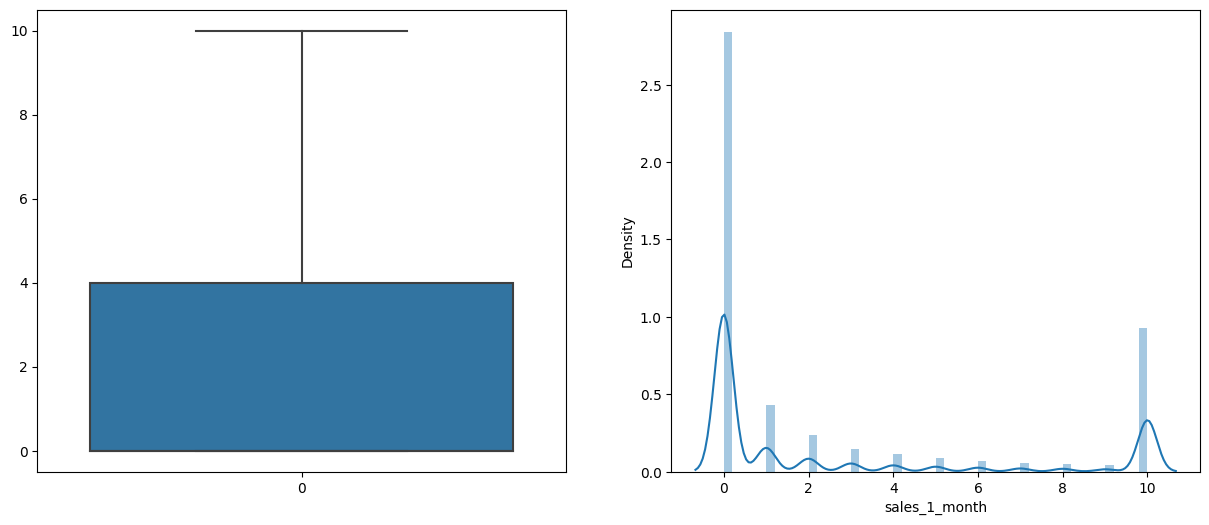

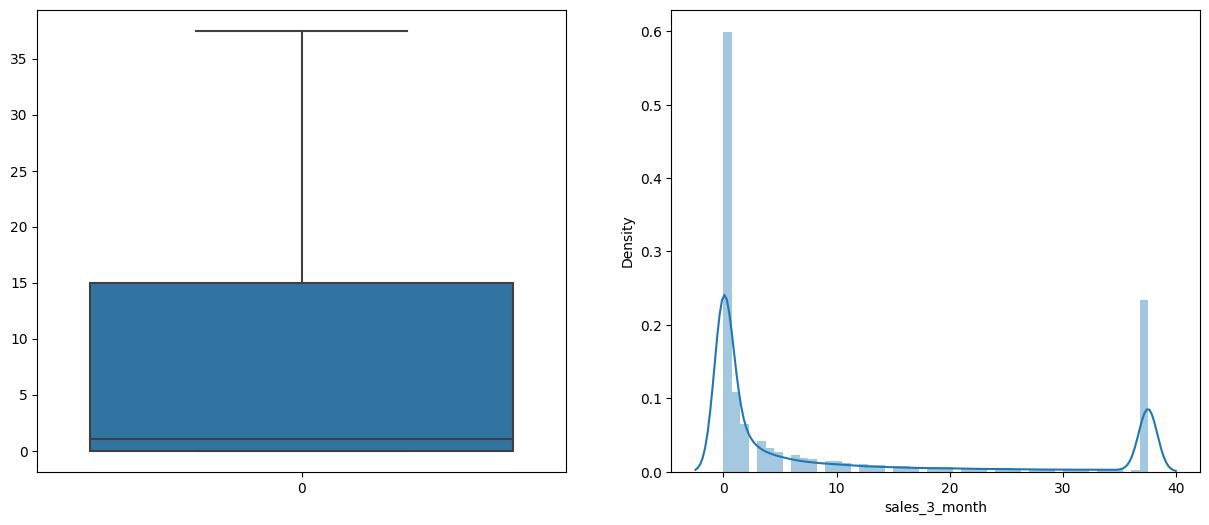

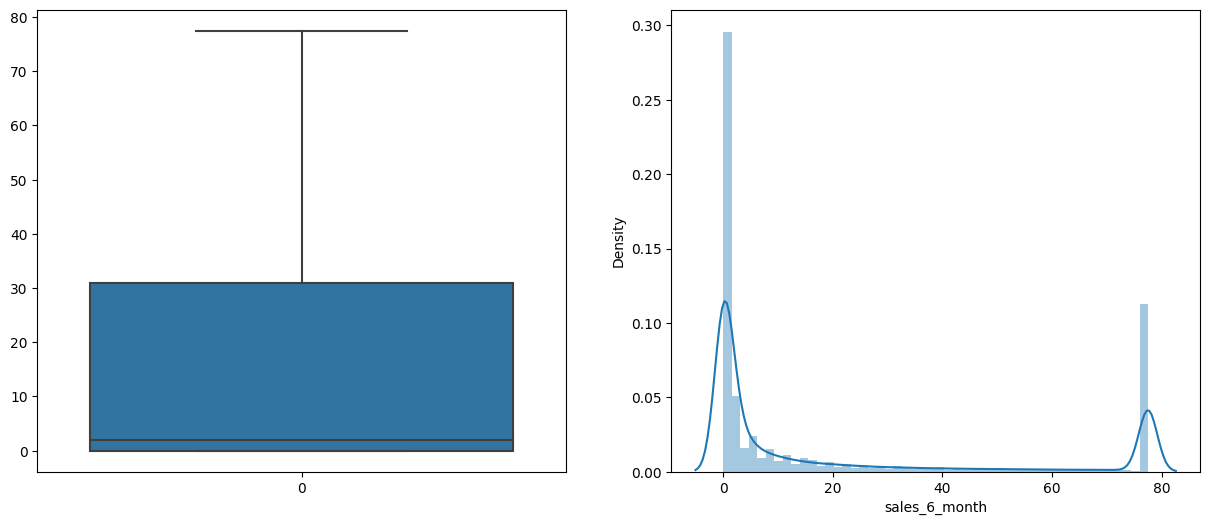

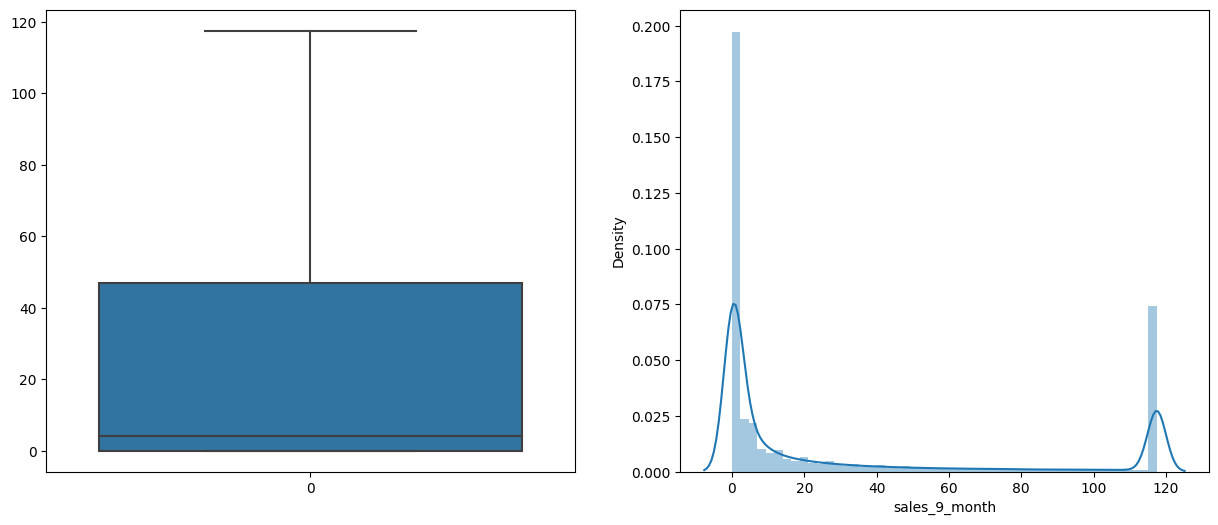

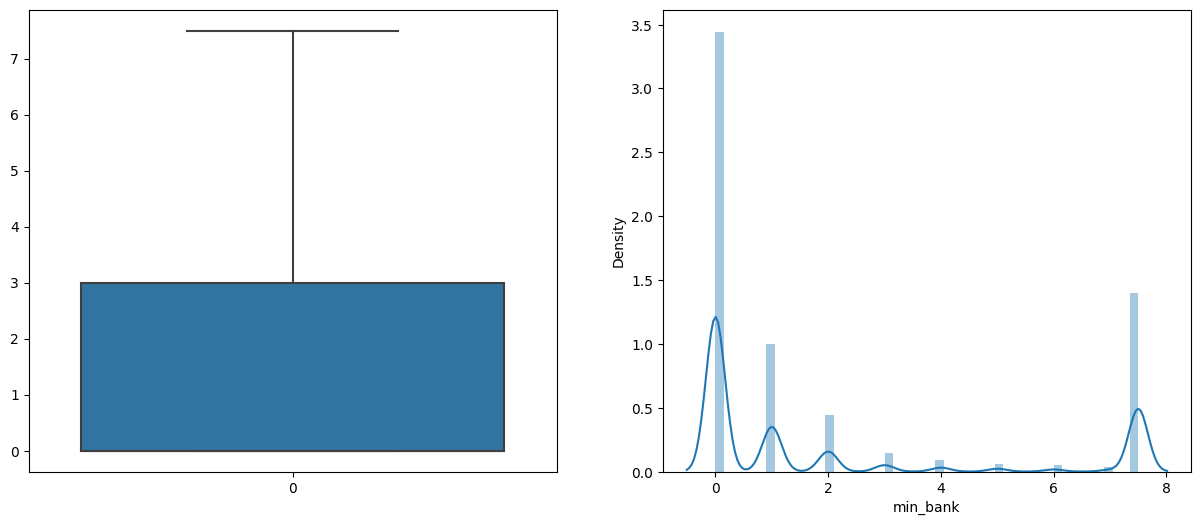

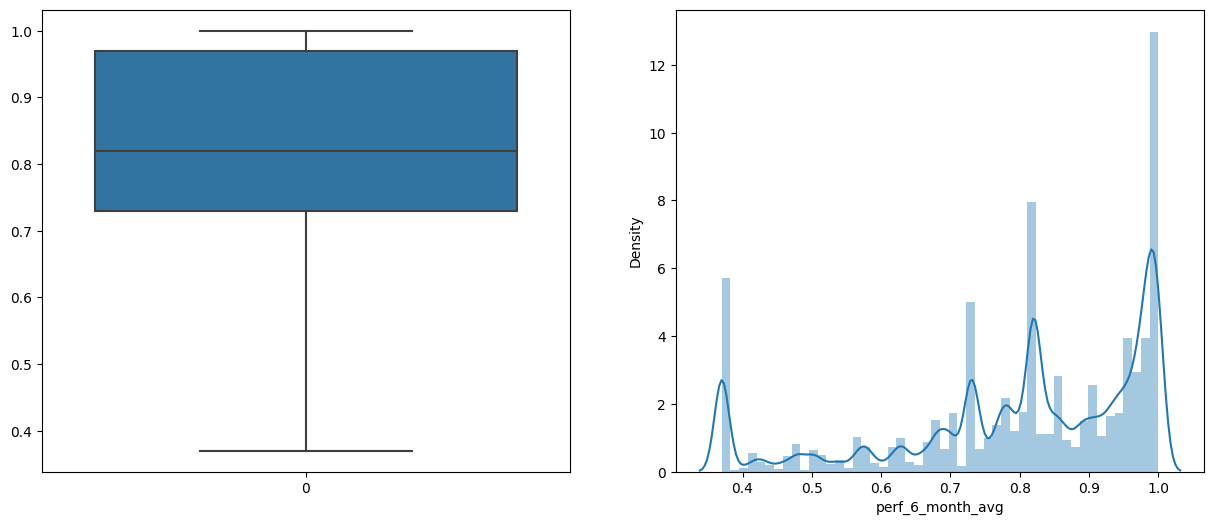

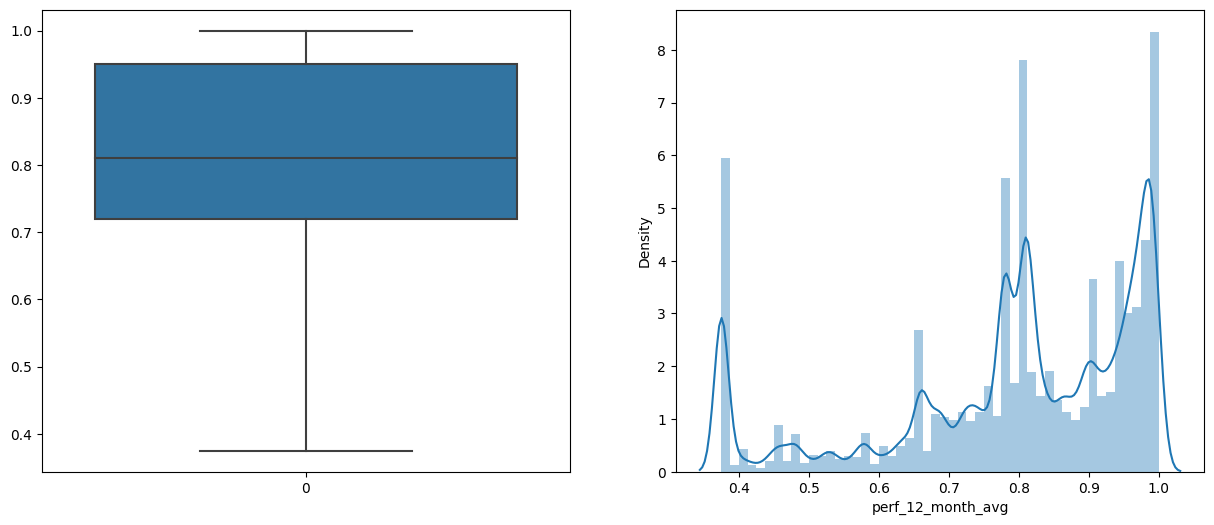

In [32]:
treat_outliers_numeric(train_df)

In [33]:
cols_to_be_checked = ['in_transit_qty']
#We can see that after treating outliers, this column is left with only null values. So lets drop it
train_df.drop(cols_to_be_checked,axis = 1,inplace=True)

In [34]:
#printing first 5 rows of train_df
train_df.head(5)

,national_inv,lead_time,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.82,0.810,No,No,No,Yes,No,No
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.99,0.990,No,No,No,Yes,No,No
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.82,0.810,Yes,No,No,Yes,No,No
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.37,0.375,No,No,No,Yes,No,No
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.82,0.810,Yes,No,No,Yes,No,No


Feature selection by correlation

In [35]:
#printing distribution of numerical columns 
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,53.536630,70.041634,0.000,4.00,15.00,80.00,194.0
lead_time,1687860.0,7.173225,3.425960,0.000,4.00,8.00,8.00,14.0
forecast_3_month,1687860.0,2.473832,4.124422,0.000,0.00,0.00,4.00,10.0
forecast_6_month,1687860.0,7.495167,12.134898,0.000,0.00,0.00,12.00,30.0
forecast_9_month,1687860.0,12.575740,20.141909,0.000,0.00,0.00,20.00,50.0
sales_1_month,1687860.0,2.621526,3.926932,0.000,0.00,0.00,4.00,10.0
sales_3_month,1687860.0,9.699347,14.409282,0.000,0.00,1.00,15.00,37.5
sales_6_month,1687860.0,20.133704,29.719470,0.000,0.00,2.00,31.00,77.5
sales_9_month,1687860.0,30.602716,45.073876,0.000,0.00,4.00,47.00,117.5
min_bank,1687860.0,2.103960,2.994974,0.000,0.00,0.00,3.00,7.5


In [36]:
#As we have the distribution of 3 month, 6 month and 9 month and they are highly correlated
# so we will consider 9th month data from forecast and sales.
to_delete_columns = ['forecast_3_month','forecast_6_month','sales_1_month','sales_3_month','sales_6_month']
train_df.drop(to_delete_columns,axis=1,inplace=True)
train_df.drop('perf_6_month_avg',axis=1,inplace=True)

In [37]:
#printing first 5 rows of train_df
train_df.head(5)

,national_inv,lead_time,forecast_9_month,sales_9_month,min_bank,potential_issue,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,No,0.810,No,No,No,Yes,No,No
1,2.0,9.0,0.0,0.0,0.0,No,0.990,No,No,No,Yes,No,No
2,2.0,8.0,0.0,0.0,0.0,No,0.810,Yes,No,No,Yes,No,No
3,7.0,8.0,0.0,0.0,1.0,No,0.375,No,No,No,Yes,No,No
4,8.0,8.0,0.0,4.0,2.0,No,0.810,Yes,No,No,Yes,No,No


In [38]:
numeric_col = [column for column in train_df.columns if train_df[column].dtype != 'object']

<Axes: >

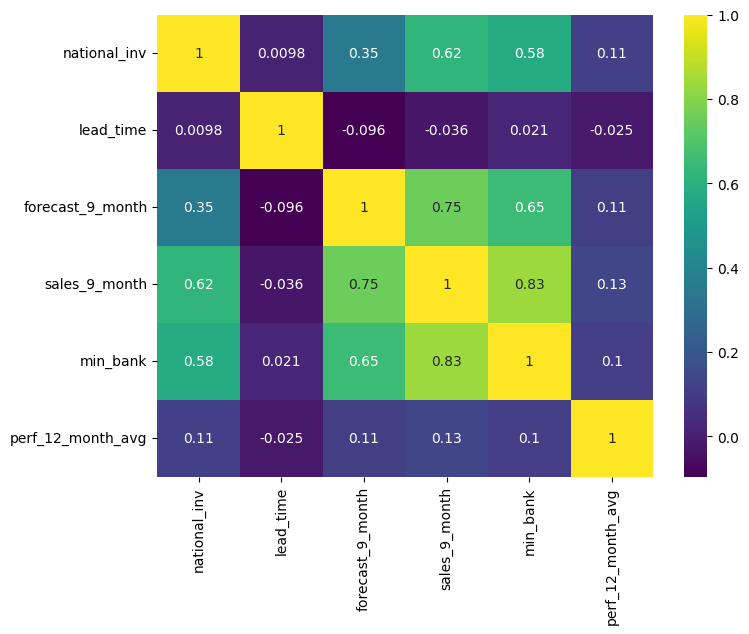

In [39]:
#Lets see the correlation of numeric variables by using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(train_df[numeric_col].corr(),annot=True,cmap='viridis')

One-Hot Encoding

In [40]:
cat_column

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [41]:
#One hot encoding
df_encoded = pd.get_dummies(train_df, columns=cat_column, drop_first=True)
df_encoded.head()

,national_inv,lead_time,forecast_9_month,sales_9_month,min_bank,perf_12_month_avg,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
0,0.0,8.0,0.0,0.0,0.0,0.810,False,False,False,False,True,False,False
1,2.0,9.0,0.0,0.0,0.0,0.990,False,False,False,False,True,False,False
2,2.0,8.0,0.0,0.0,0.0,0.810,False,True,False,False,True,False,False
3,7.0,8.0,0.0,0.0,1.0,0.375,False,False,False,False,True,False,False
4,8.0,8.0,0.0,4.0,2.0,0.810,False,True,False,False,True,False,False


<Axes: >

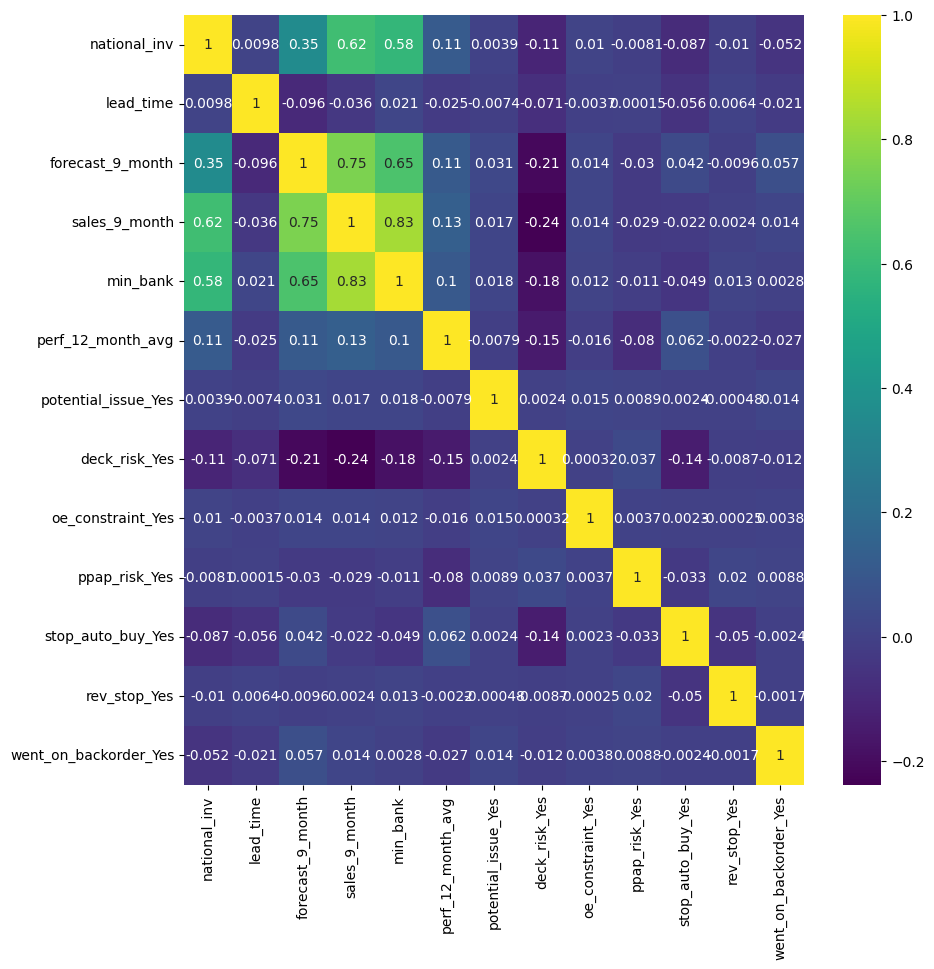

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df_encoded.corr(),annot=True,cmap='viridis')

Scaling Variables using Min max scaler

In [44]:
#Min max scaler
column_names = list(df_encoded.columns)

#using standardization as both numeric columns are in different scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_encoded[df_encoded.columns]) 
#print(scaled)
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded[df_encoded.columns]))
df_scaled.columns = column_names

In [45]:
#Printing first 5 rows of scaled data
df_scaled.head()

,national_inv,lead_time,forecast_9_month,sales_9_month,min_bank,perf_12_month_avg,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,went_on_backorder_Yes
0,0.000000,0.571429,0.0,0.000000,0.000000,0.696,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.010309,0.642857,0.0,0.000000,0.000000,0.984,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.010309,0.571429,0.0,0.000000,0.000000,0.696,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.036082,0.571429,0.0,0.000000,0.133333,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.041237,0.571429,0.0,0.034043,0.266667,0.696,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [46]:
# Selecting dependent & independent variables for model building
X= df_scaled.drop(['went_on_backorder_Yes'], axis=1)
y=df_scaled['went_on_backorder_Yes']

In [47]:
#printing first 5 rows of X
X.head()

,national_inv,lead_time,forecast_9_month,sales_9_month,min_bank,perf_12_month_avg,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
0,0.000000,0.571429,0.0,0.000000,0.000000,0.696,0.0,0.0,0.0,0.0,1.0,0.0
1,0.010309,0.642857,0.0,0.000000,0.000000,0.984,0.0,0.0,0.0,0.0,1.0,0.0
2,0.010309,0.571429,0.0,0.000000,0.000000,0.696,0.0,1.0,0.0,0.0,1.0,0.0
3,0.036082,0.571429,0.0,0.000000,0.133333,0.000,0.0,0.0,0.0,0.0,1.0,0.0
4,0.041237,0.571429,0.0,0.034043,0.266667,0.696,0.0,1.0,0.0,0.0,1.0,0.0


## SMOTE


In [48]:
#importing required libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)

#using class_wieghts

class_weight = {0: 1,
                1: 6}

{0.0: 1676567, 1.0: 11293} {0.0: 1676566, 1.0: 1341253}


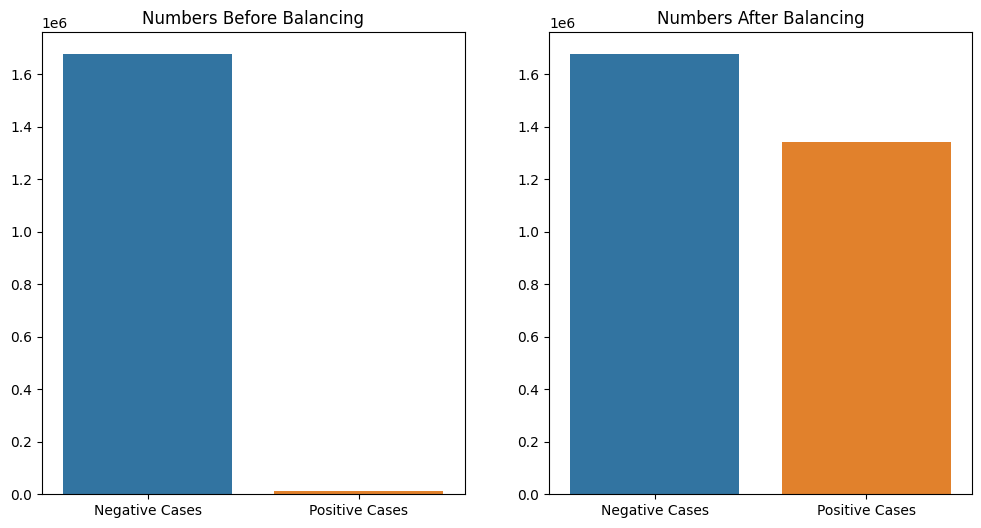

In [52]:
#Plotting bar graph for dependent variable counts before SMOTE and after SMOTE
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y = list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [54]:
#Splitting the Data into Training data & Test Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=.20,random_state=5)

# **Building** **Models**

### LogisticRegression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
Lr=LogisticRegression()
pram_grid={'C':[0.01,0.1,1],'penalty':['l1','l2']}
clf_lr=GridSearchCV(Lr,pram_grid)
clf_lr.fit(x_train,y_train)
lr_y_pred=clf_lr.predict(x_test)
Accuracy_score=metrics.accuracy_score(y_test, lr_y_pred)

print('\n*********************\n')
print(confusion_matrix(y_test,lr_y_pred))
print('\n*********************\n')
print(classification_report(y_test, lr_y_pred))
print('\n*********************\n')
print("Accuracy Score:",Accuracy_score)


*********************

[[284755  50141]
 [ 78429 190239]]

*********************

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.82    334896
         1.0       0.79      0.71      0.75    268668

    accuracy                           0.79    603564
   macro avg       0.79      0.78      0.78    603564
weighted avg       0.79      0.79      0.79    603564


*********************

Accuracy Score: 0.7869819936245369


### KNeighborsClassifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_y_pred=knn.predict(x_test)
Accuracy_score=metrics.accuracy_score(y_test, knn_y_pred)
print('\n*********************\n')
print(confusion_matrix(y_test, knn_y_pred))
print('\n*********************\n')
print(classification_report(y_test, knn_y_pred))
print('\n*********************\n')
print("Accuracy Score:",Accuracy_score)


*********************

[[325138   9758]
 [  4043 264625]]

*********************

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98    334896
         1.0       0.96      0.98      0.97    268668

    accuracy                           0.98    603564
   macro avg       0.98      0.98      0.98    603564
weighted avg       0.98      0.98      0.98    603564


*********************

Accuracy Score: 0.9771341564440557


In [59]:
Accuracy_score=metrics.accuracy_score(y_test, knn_y_pred)
precision = metrics.precision_score(y_test, knn_y_pred)
recall = metrics.recall_score(y_test, knn_y_pred)
f1_score = metrics.f1_score(y_test, knn_y_pred)

print("Accuracy Score:",Accuracy_score)
print('Precison:', precision)
print('Recall:', recall)
print('F1 score', f1_score)

Accuracy Score: 0.9771341564440557
Precison: 0.9644365722366182
Recall: 0.984951687584677
F1 score 0.9745861806717969


### DecisionTreeClassifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
dtc = DecisionTreeClassifier()
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

In [61]:
pram_grid={'criterion':["gini"],'max_depth':[3,5,10],'min_samples_split':[5,10,15]}
clf_dtc=RandomizedSearchCV(dtc, pram_grid, n_jobs=1, cv=5)
clf_dtc.fit(x_train,y_train)
svm_y_pred=clf_dtc.predict(x_test)
Accuracy_score=metrics.accuracy_score(y_test, svm_y_pred)
precision = metrics.precision_score(y_test, svm_y_pred)
recall = metrics.recall_score(y_test, svm_y_pred)
f1_score = metrics.f1_score(y_test, svm_y_pred)

print('\n*********************\n')
print(confusion_matrix(y_test,svm_y_pred))
print('\n*********************\n')
print(classification_report(y_test, svm_y_pred))
print('\n*********************\n')
print("Accuracy Score:",Accuracy_score)
print('Precison:', precision)
print('Recall:', recall)
print('F1 score', f1_score)


*********************

[[306413  28483]
 [ 28674 239994]]

*********************

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91    334896
         1.0       0.89      0.89      0.89    268668

    accuracy                           0.91    603564
   macro avg       0.90      0.90      0.90    603564
weighted avg       0.91      0.91      0.91    603564


*********************

Accuracy Score: 0.905300846306274
Precison: 0.8939089754429616
Recall: 0.8932734825137344
F1 score 0.8935911159928882


### RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
Rf = RandomForestClassifier()
Rf.fit(x_train,y_train)
svm_y_pred=Rf.predict(x_test)
Accuracy_score=metrics.accuracy_score(y_test, svm_y_pred)
precision = metrics.precision_score(y_test, svm_y_pred)
recall = metrics.recall_score(y_test, svm_y_pred)
f1_score = metrics.f1_score(y_test, svm_y_pred)

print('\n*********************\n')
print(confusion_matrix(y_test,svm_y_pred))
print('\n*********************\n')
print(classification_report(y_test, svm_y_pred))
print('\n*********************\n')
print("Accuracy Score:",Accuracy_score)
print('Precison:', precision)
print('Recall:', recall)
print('F1 score', f1_score)


*********************

[[332133   2763]
 [  3424 265244]]

*********************

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    334896
         1.0       0.99      0.99      0.99    268668

    accuracy                           0.99    603564
   macro avg       0.99      0.99      0.99    603564
weighted avg       0.99      0.99      0.99    603564


*********************

Accuracy Score: 0.9897492229490161
Precison: 0.9896905677836773
Recall: 0.9872556463739635
F1 score 0.9884716075837332


**Our imported dataset had 1687860 rows and 23 columns. When we started analyzing our data it had 2 columns local_bo_qty and pieces_past_due
with 98% missing values we removed those variables, we also had one variable with missing values 100894, replaced them with median, replaced all the negative values in national_inv column with zero
after cleaning data we performed EDA where we found that variables like forecast_3month, forecast_6month, forecast_9month
sales_1_month,sales_3_month sales_6_month sales_9_month were highly correalted to each other we kept 9th month data and removed remaining variables. Used one hot encoding for the categorical variables, min max scaler to scale down the variables.As our dataset had outliers and was imbalanced. Capped the outliers by IQR range and used SMOTE technique to balance dataset. Used logistic regression,kneighbors classifier, decision tree classifier, random forest classifier with hyperparameter tunning to train the model**